In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns


In [ ]:
#reading the datasets
dh=pd.read_csv("heart.csv")
dh.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
da=pd.read_csv("AirQualityUCI.csv",sep=";")
da.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [ ]:
da.shape

(9471, 17)

In [ ]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [ ]:
dh.isnull().sum()
#this data is clean

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
da.isnull().sum()
#this shows that there are many null values so we need to clean this dataset

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [ ]:
# drop the unamed columns
da=da.drop(["Unnamed: 15","Unnamed: 16"],axis=1)
da.isnull().sum()

#axis{0 or ‘index’, 1 or ‘columns’}, default 0
#Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [ ]:
#fillna is used to fill values in null values. here filling the mean values of the columns.
cols1=['PT08.S1(CO)','NMHC(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)']
for i in cols1:
    mean_value=da[i].mean()
    da[i]=da[i].fillna(value=mean_value)

In [ ]:
da.isna().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)        0
NMHC(GT)           0
C6H6(GT)         114
PT08.S2(NMHC)      0
NOx(GT)            0
PT08.S3(NOx)       0
NO2(GT)            0
PT08.S4(NO2)       0
PT08.S5(O3)        0
T                114
RH               114
AH               114
dtype: int64

In [ ]:
cols2=['Date','Time','CO(GT)','C6H6(GT)','T','RH','AH']
for i in cols2:
    da[i]=da[i].fillna(method="ffill")

# used to fill the missing value in the dataframe. ‘ffill’ stands for ‘forward fill’ and will propagate last valid observation forward.
 

In [ ]:
all_cols=cols1+cols2

In [ ]:
da.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [ ]:
#Data is now clean

In [ ]:
# Data integration

# merging two csv files
df = pd.concat(
    map(pd.read_csv, ['AirQualityUCI.csv', 'heart.csv']), ignore_index=True)
print(df)

      Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;  \
0                                                 7578;;                                                                             
1                                                    NaN                                                                             
2                                                 7502;;                                                                             
3                                                 7867;;                                                                             
4                                                 7888;;                                                                             
...                                                  ...                                                                             
10491                                                NaN      

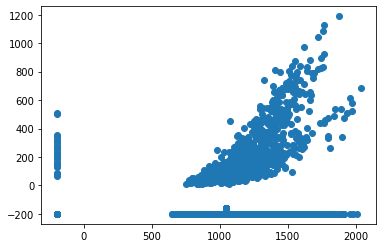

In [ ]:
# outlier detection using scatter plot
import matplotlib.pyplot as plt
plt.scatter(da['PT08.S1(CO)'], da['NMHC(GT)'])


In [ ]:
# data transformation

#aggregation
df.aggregate({"age":['max', 'min'],
              "trestbps":['min', 'sum']})

,age,trestbps
max,77.0,NaN
min,29.0,94.0
sum,NaN,134902.0


In [ ]:
#quantile transformation :  bin the data records of each variable into k groups

#Import the class
from sklearn.preprocessing import KBinsDiscretizer
 
#Discrete the data
transf = KBinsDiscretizer(n_bins = 10, encode = 'ordinal', strategy = 'quantile')
 
#fit transform 
data = transf.fit_transform(dh)
 
#Array to dataframe
from pandas import DataFrame
 
data1 = DataFrame(data)
 
#Peak into data
data1.head(5)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." %

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,3.0,0.0,0.0,2.0,2.0,0.0,1.0,7.0,0.0,2.0,1.0,2.0,2.0,0.0
1,4.0,0.0,0.0,6.0,1.0,0.0,0.0,5.0,0.0,6.0,0.0,0.0,2.0,0.0
2,9.0,0.0,0.0,7.0,0.0,0.0,1.0,1.0,0.0,5.0,0.0,0.0,2.0,0.0
3,7.0,0.0,0.0,7.0,1.0,0.0,1.0,6.0,0.0,0.0,1.0,1.0,2.0,0.0
4,8.0,0.0,0.0,5.0,8.0,0.0,1.0,0.0,0.0,4.0,1.0,2.0,1.0,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f15d89fe790>,
      dtype=object)

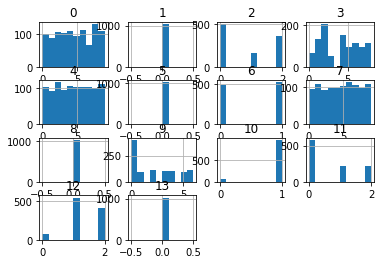

In [ ]:
#visualize the data
 
import matplotlib.pyplot as plt
 
data1.hist()

In [ ]:
# ERROR CORRECTION 

In [ ]:
#no of outliers in a particular column can be found as follows:
da[(da['PT08.S1(CO)']<0)].shape
#here 366 rows have the value of this column as outlier. Similarly for other columns we can find the no of outliers

(366, 15)

In [ ]:
da[(da['NOx(GT)']<0)].shape

(1639, 15)

In [ ]:
#replacing the outliers with median values of the columns
for col in cols1:
    median =da.loc[da[col]>0,col].median()
    da[col]=np.where(da[col]<0, median,da[col])

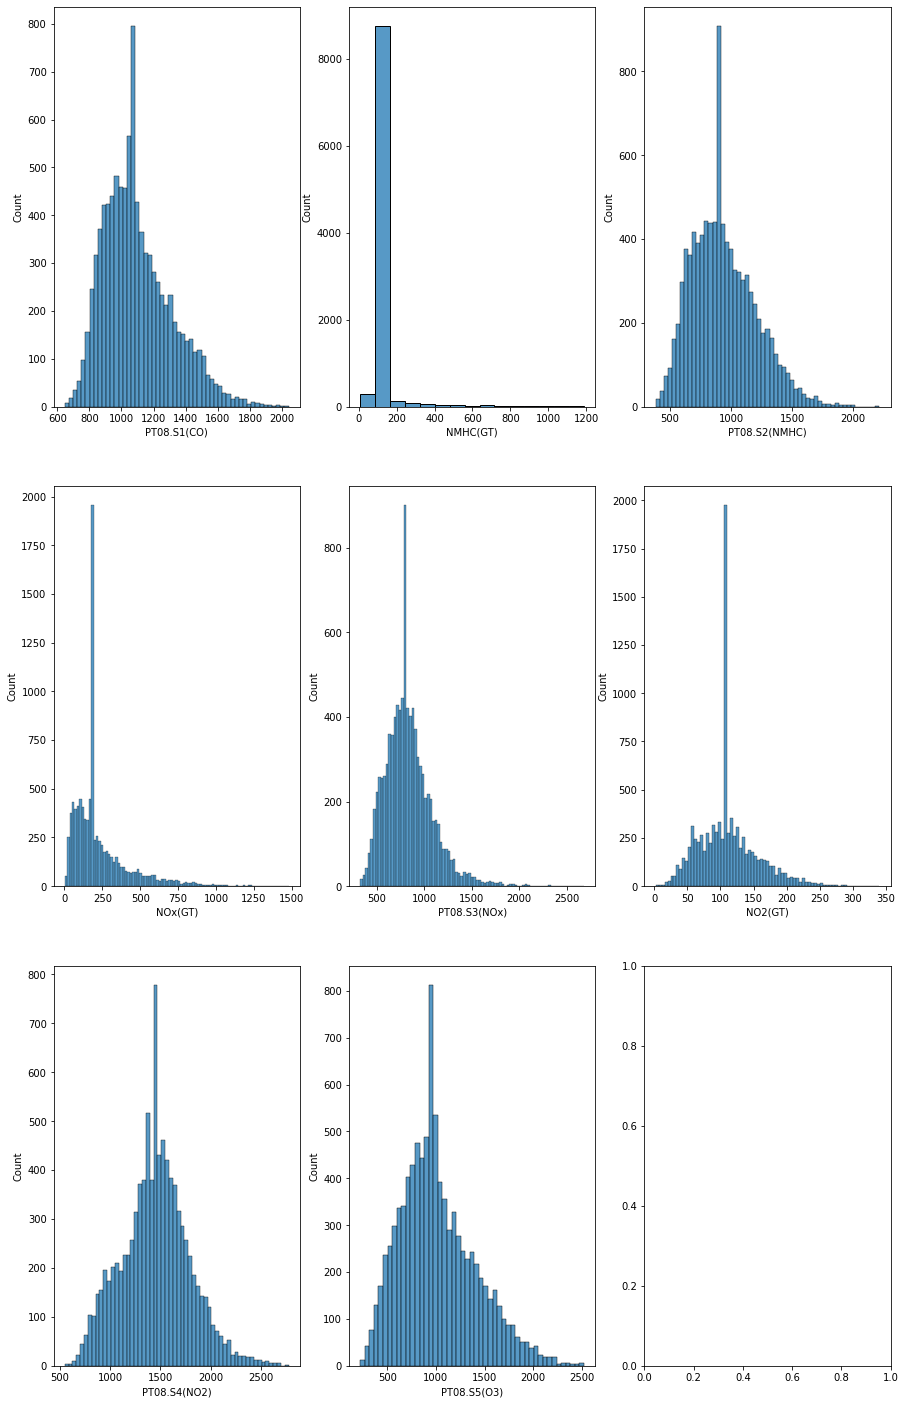

In [ ]:
#plotting the histograms again so that we can see outliers have been tackled
import matplotlib.pyplot as plt #for subplot
fig, axes = plt.subplots(3,3, figsize=(15,25))
r=0
c=0
for column in cols1:
    sns.histplot(da[column],ax=axes[r,c])
    c=c+1
    if(c==3):
        r+=1
        c=0


In [ ]:
# DATA TRANSFORMATION
#Dividing the data into partitions

In [ ]:
#division using a few columns
df1=da[["Date","Time"]]
df1.head()

,Date,Time
0,10/03/2004,18.00.00
1,10/03/2004,19.00.00
2,10/03/2004,20.00.00
3,10/03/2004,21.00.00
4,10/03/2004,22.00.00


In [ ]:
#division using rest of the columns
df2=da[cols1]
df2.head()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
0,1360.0,150.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0
1,1292.0,112.0,955.0,103.0,1174.0,92.0,1559.0,972.0
2,1402.0,88.0,939.0,131.0,1140.0,114.0,1555.0,1074.0
3,1376.0,80.0,948.0,172.0,1092.0,122.0,1584.0,1203.0
4,1272.0,51.0,836.0,131.0,1205.0,116.0,1490.0,1110.0


In [ ]:
da.shape #finding out no of rows

(9471, 15)

In [ ]:
#dividing the dataset into half with half rows
df3=da.truncate(1,9471/2)
df3

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
5,10/03/2004,23.00.00,"1,2",1197.0,38.0,"4,7",750.0,89.0,1337.0,96.0,1393.0,949.0,"11,2","59,2","0,7848"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4731,23/09/2004,21.00.00,"2,3",1168.0,150.0,"12,6",1070.0,228.0,667.0,116.0,1646.0,1102.0,"25,1","50,5","1,5840"
4732,23/09/2004,22.00.00,"2,1",1111.0,150.0,"10,3",991.0,218.0,721.0,109.0,1559.0,1028.0,"24,1","50,7","1,4959"
4733,23/09/2004,23.00.00,"1,7",1071.0,150.0,"8,9",934.0,179.0,763.0,94.0,1504.0,942.0,"22,5","53,7","1,4486"
4734,24/09/2004,00.00.00,1,969.0,150.0,"6,5",835.0,97.0,859.0,64.0,1437.0,773.0,"22,7","53,7","1,4580"


In [ ]:
#dividing the dataset into half with the other half rows
df4=da.truncate(9471/2,9471)
df4

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
4736,24/09/2004,02.00.00,"0,7",923.000000,150.0,"4,6",744.000000,80.000000,908.000000,64.000000,1394.000000,815.000000,"22,3","55,8","1,4828"
4737,24/09/2004,03.00.00,"0,4",813.000000,150.0,"2,0",581.000000,177.000000,1176.000000,108.000000,1320.000000,627.000000,"22,7","53,8","1,4673"
4738,24/09/2004,04.00.00,"0,4",851.000000,150.0,"2,5",618.000000,66.000000,1099.000000,52.000000,1351.000000,642.000000,"21,1","59,9","1,4789"
4739,24/09/2004,05.00.00,"0,5",868.000000,150.0,"2,8",639.000000,109.000000,1093.000000,55.000000,1367.000000,610.000000,"20,4","63,0","1,4946"
4740,24/09/2004,06.00.00,"1,3",1062.000000,150.0,"8,4",915.000000,232.000000,792.000000,83.000000,1579.000000,929.000000,"20,8","62,2","1,5119"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,04/04/2005,14.00.00,"2,2",1048.990061,150.0,"11,9",894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,"28,5","13,1","0,5028"
9467,04/04/2005,14.00.00,"2,2",1048.990061,150.0,"11,9",894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,"28,5","13,1","0,5028"
9468,04/04/2005,14.00.00,"2,2",1048.990061,150.0,"11,9",894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,"28,5","13,1","0,5028"
9469,04/04/2005,14.00.00,"2,2",1048.990061,150.0,"11,9",894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,"28,5","13,1","0,5028"


In [ ]:
df5=da[["Time","CO(GT)"]]
df5.head()

,Time,CO(GT)
0,18.00.00,"2,6"
1,19.00.00,2
2,20.00.00,"2,2"
3,21.00.00,"2,2"
4,22.00.00,"1,6"


In [ ]:
#Merging the division of datasets

In [ ]:
df_merged1=pd.concat([df3,df4])
df_merged1

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
1,10/03/2004,19.00.00,2,1292.000000,112.0,"9,4",955.000000,103.000000,1174.000000,92.000000,1559.000000,972.000000,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.000000,88.0,"9,0",939.000000,131.000000,1140.000000,114.000000,1555.000000,1074.000000,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.000000,80.0,"9,2",948.000000,172.000000,1092.000000,122.000000,1584.000000,1203.000000,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.000000,51.0,"6,5",836.000000,131.000000,1205.000000,116.000000,1490.000000,1110.000000,"11,2","59,6","0,7888"
5,10/03/2004,23.00.00,"1,2",1197.000000,38.0,"4,7",750.000000,89.000000,1337.000000,96.000000,1393.000000,949.000000,"11,2","59,2","0,7848"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,04/04/2005,14.00.00,"2,2",1048.990061,150.0,"11,9",894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,"28,5","13,1","0,5028"
9467,04/04/2005,14.00.00,"2,2",1048.990061,150.0,"11,9",894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,"28,5","13,1","0,5028"
9468,04/04/2005,14.00.00,"2,2",1048.990061,150.0,"11,9",894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,"28,5","13,1","0,5028"
9469,04/04/2005,14.00.00,"2,2",1048.990061,150.0,"11,9",894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,"28,5","13,1","0,5028"


In [ ]:
#merging datasets with common attributes. here "Time" for df1 and df5
df_merged2=pd.concat([df1,df5])
df_merged2

,Date,Time,CO(GT)
0,10/03/2004,18.00.00,NaN
1,10/03/2004,19.00.00,NaN
2,10/03/2004,20.00.00,NaN
3,10/03/2004,21.00.00,NaN
4,10/03/2004,22.00.00,NaN
...,...,...,...
9466,NaN,14.00.00,"2,2"
9467,NaN,14.00.00,"2,2"
9468,NaN,14.00.00,"2,2"
9469,NaN,14.00.00,"2,2"


In [ ]:
df_merged3=pd.concat([df1,df2])
df_merged3

,Date,Time,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
0,10/03/2004,18.00.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/03/2004,19.00.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10/03/2004,20.00.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10/03/2004,21.00.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10/03/2004,22.00.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,1048.990061,150.0,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032
9467,NaN,NaN,1048.990061,150.0,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032
9468,NaN,NaN,1048.990061,150.0,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032
9469,NaN,NaN,1048.990061,150.0,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032


In [ ]:
# DATA MODEL BUILDING
dh = dh.dropna(axis=0)

In [ ]:
#prediction target
y = dh.target

In [ ]:
features = ['age', 'trestbps', 'chol', 'thalach', 'thal']
X = dh[features]
X.describe()


,age,trestbps,chol,thalach,thal
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,2.323902
std,9.072290,17.516718,51.59251,23.005724,0.620660
min,29.000000,94.000000,126.00000,71.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,2.000000
50%,56.000000,130.000000,240.00000,152.000000,2.000000
75%,61.000000,140.000000,275.00000,166.000000,3.000000
max,77.000000,200.000000,564.00000,202.000000,3.000000


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
data_model = DecisionTreeRegressor(random_state=1)

# Fit model
data_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [ ]:
print("Making predictions for the following 5 :")
print(X.head())
print("The predictions are")
print(data_model.predict(X.head()))

Making predictions for the following 5 :
   age  trestbps  chol  thalach  thal
0   52       125   212      168     3
1   53       140   203      155     3
2   70       145   174      125     3
3   61       148   203      161     3
4   62       138   294      106     2
The predictions are
[0. 0. 0. 0. 0.]


In [ ]:

# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
 
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
 
# making predictions on the testing set
y_pred = gnb.predict(X_test)
y_pred
print(gnb.score(X_test, y_test))

 
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

0.7317073170731707
Gaussian Naive Bayes model accuracy(in %): 73.17073170731707


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)
knn.score(X_test, y_test)


0.824390243902439